In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###########################################################
# Load Classifier and Data
###########################################################
pipeline = joblib.load('pipeline_classifier.pkl')
training_data = pd.read_csv("dataset/data_train.csv")

y_train = training_data['SOURCE'].map({'out': 0, 'in': 1})
X_train = training_data.drop(columns=['SOURCE'])

# Preprocess training data
X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [2]:
###########################################################
# Compute Threshold and k_max
###########################################################
def compute_threshold_and_kmax(X_train, threshold_percentile=5):
    """
    Compute the threshold and k_max based on training distances
    - X_train: The training feature matrix (normalized).
    - threshold_percentile: Percentile for the distance threshold.

    Returns:
    - threshold: The distance threshold for neighbors.
    - k_max: The maximum number of neighbors within the threshold.
    - upper_triangle: Array of unique pairwise distances.
    """
    # Compute pairwise distances
    distances = np.linalg.norm(X_train[:, np.newaxis] - X_train, axis=2)
    upper_triangle = distances[np.triu_indices(distances.shape[0], k=1)]  # Unique pairwise distances
    threshold = np.percentile(upper_triangle, threshold_percentile)

    # Compute k_max (average number of neighbors within the threshold)
    neighbors_within_threshold = np.sum(distances < threshold, axis=1) - 1
    k_max = int(np.mean(neighbors_within_threshold))

    return threshold, k_max, upper_triangle


###########################################################
# Visualization
###########################################################
def plot_distance_distribution(pairwise_distances, threshold):
    """
    Plot the distribution of pairwise distances with a threshold line.

    Parameters:
    - pairwise_distances: 1D array of unique pairwise distances.
    - threshold: Distance threshold.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(pairwise_distances, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold:.2f}')
    plt.title("Distribution of Pairwise Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


def print_percentiles(pairwise_distances, percentiles):
    percentile_values = {f"{p}th": np.percentile(pairwise_distances, p) for p in percentiles}
    print("Percentiles of Pairwise Distances:")
    for key, value in percentile_values.items():
        print(f"{key}: {value:.4f}")
    return percentile_values

In [3]:
###########################################################
# Execution
###########################################################

# Compute threshold and k_max
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, threshold_percentile=5)

# Print the computed threshold and k_max
print(f"Computed Threshold: {threshold:.4f}")
print(f"Computed k_max: {k_max}")

# Print percentiles
percentiles_to_compute = [0.5, 0.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 7.5, 10, 25, 50, 75, 90]
percentile_values = print_percentiles(pairwise_distances, percentiles_to_compute)

Computed Threshold: 0.2235
Computed k_max: 198
Percentiles of Pairwise Distances:
0.5th: 0.1249
0.75th: 0.1369
1th: 0.1465
1.5th: 0.1615
2th: 0.1736
2.5th: 0.1841
3th: 0.1933
3.5th: 0.2016
4th: 0.2093
4.5th: 0.2165
5th: 0.2235
7.5th: 0.2538
10th: 0.2805
25th: 0.4256
50th: 1.0067
75th: 1.0942
90th: 1.1744


Threshold: 0.08774797295969519, k_max: 3


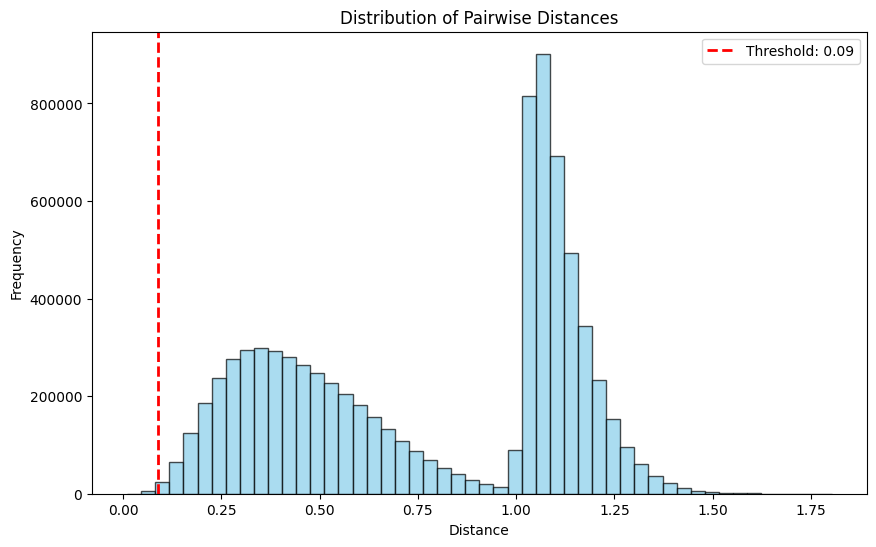

In [4]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, .1)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.10723016075771301, k_max: 9


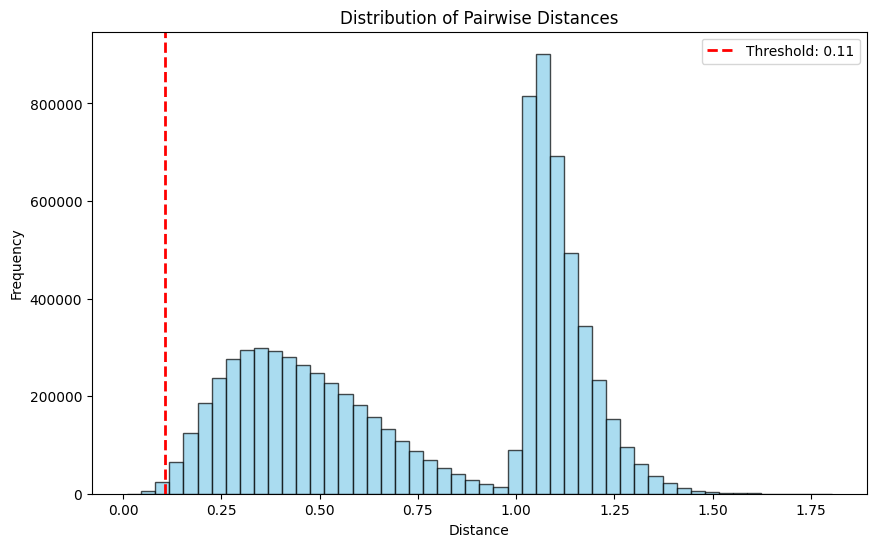

In [5]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, .25)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.12488696783450025, k_max: 19


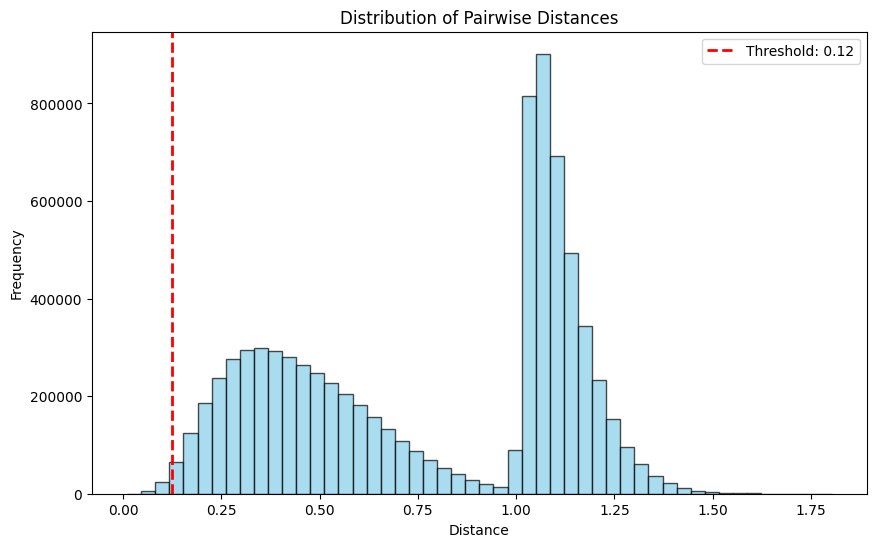

In [6]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, .5)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.13693495109186077, k_max: 29


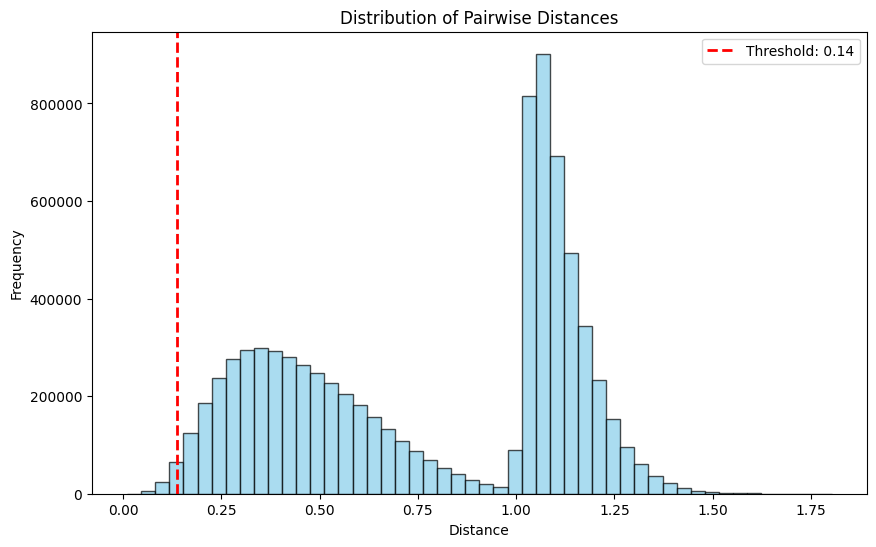

In [7]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, .75)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.14653029331142356, k_max: 39


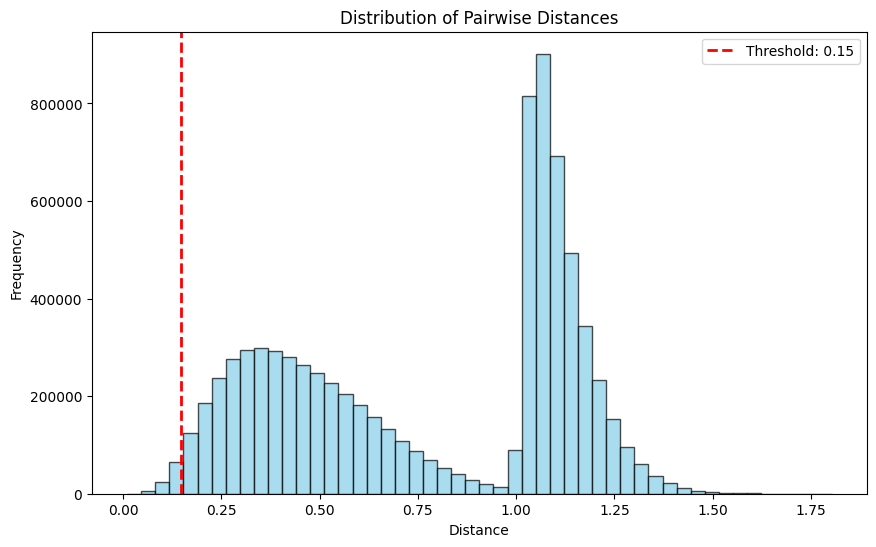

In [8]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 1)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.15457401419723488, k_max: 49


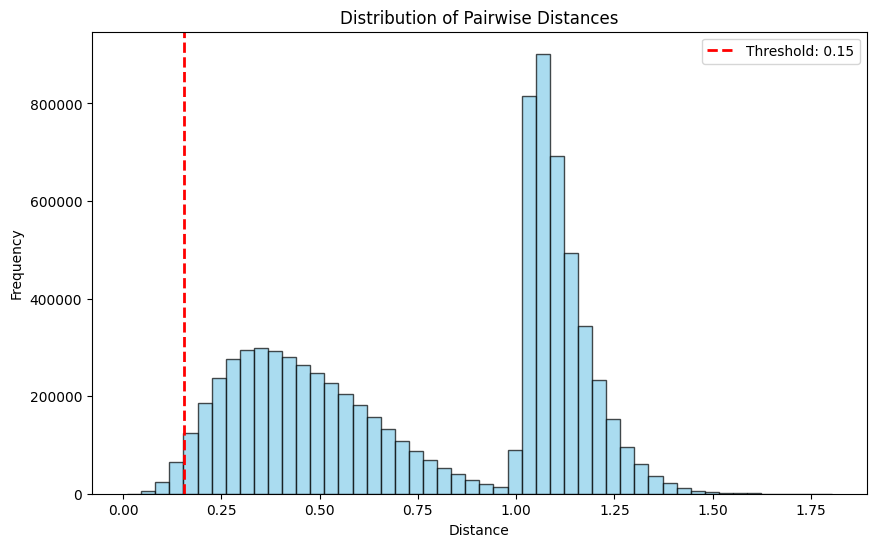

In [9]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 1.25)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.161545019146754, k_max: 59


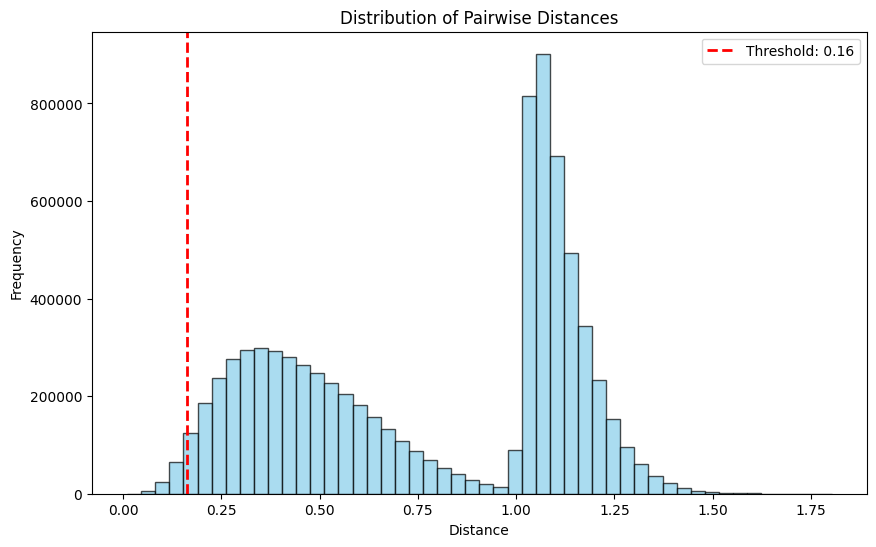

In [10]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 1.5)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.16788822361015243, k_max: 69


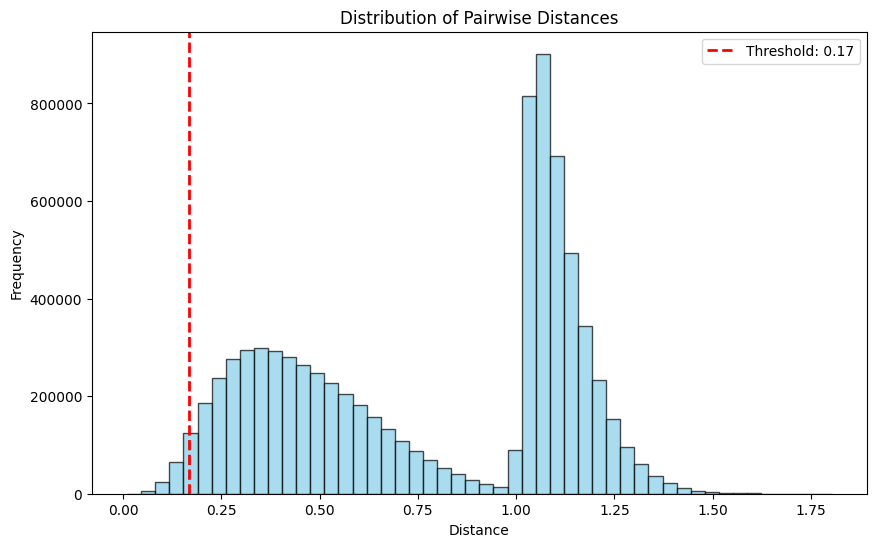

In [11]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 1.75)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.17361507927602896, k_max: 79


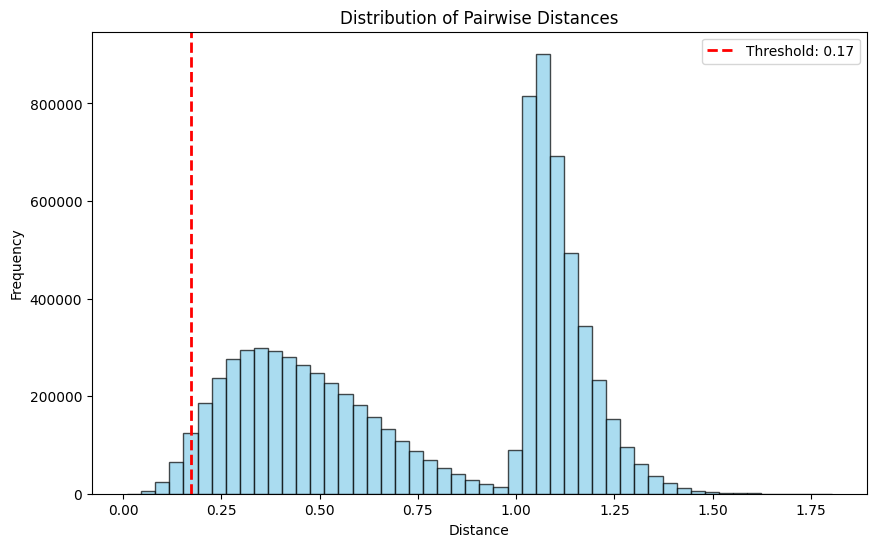

In [12]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 2)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.1840718307429409, k_max: 99


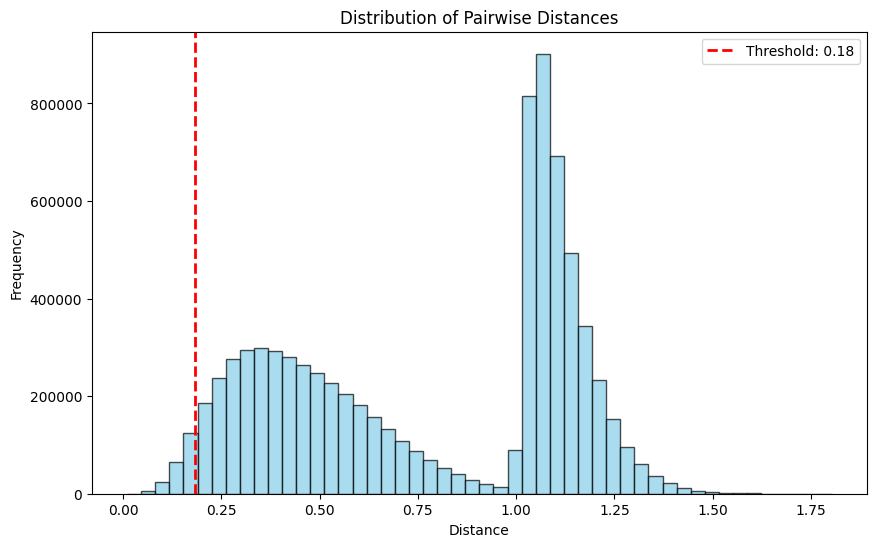

In [13]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 2.5)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.19326235068252717, k_max: 119


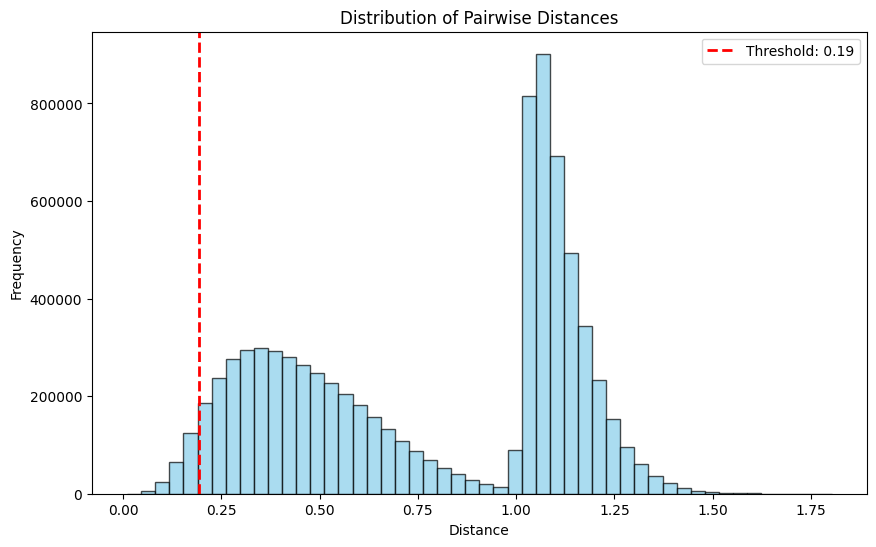

In [14]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 3)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.2015511459662661, k_max: 138


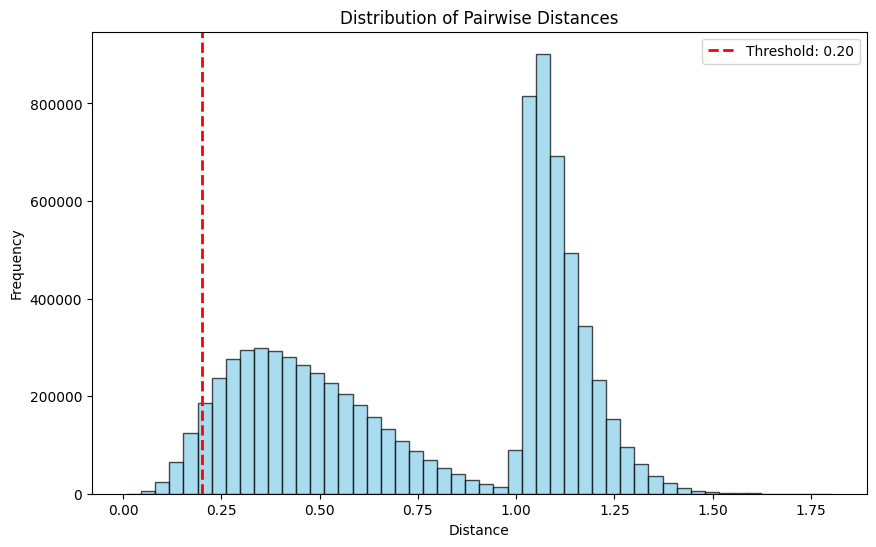

In [15]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 3.5)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.20931108317188787, k_max: 158


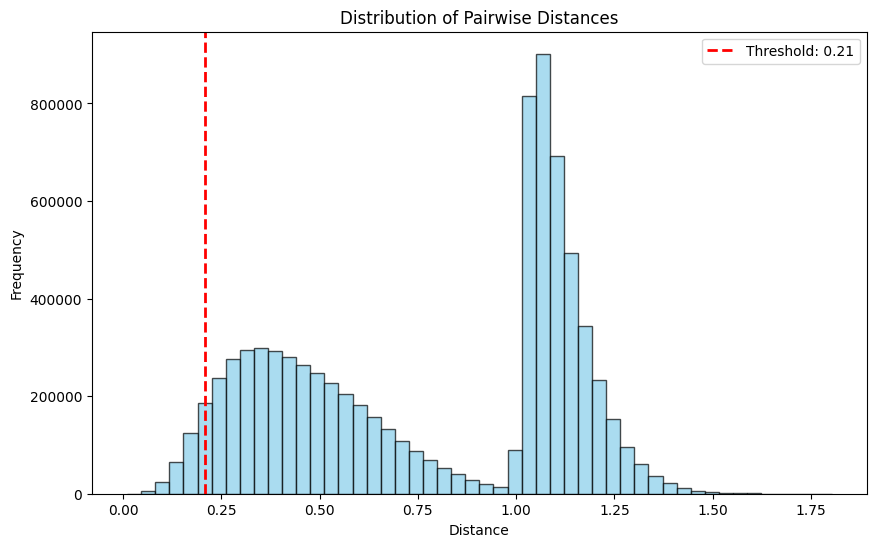

In [16]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 4)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.21652953390685603, k_max: 178


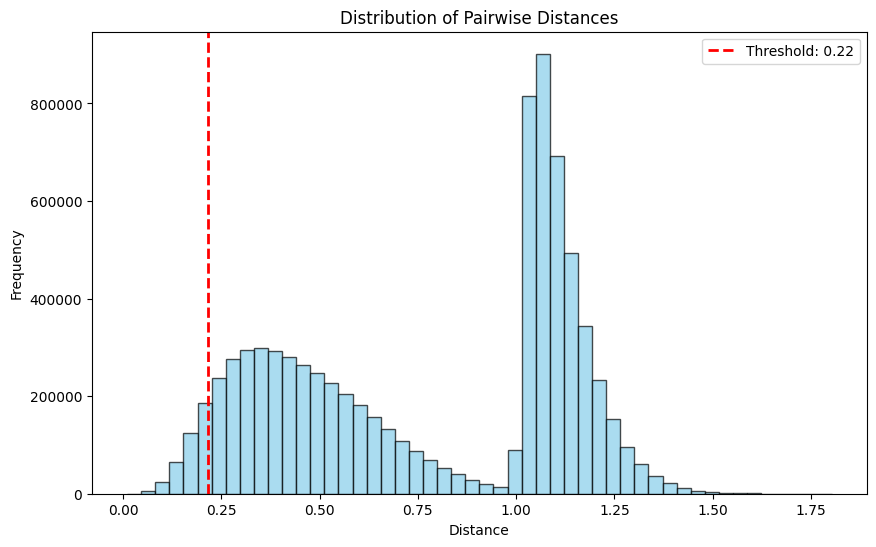

In [17]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 4.5)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.223461316930842, k_max: 198


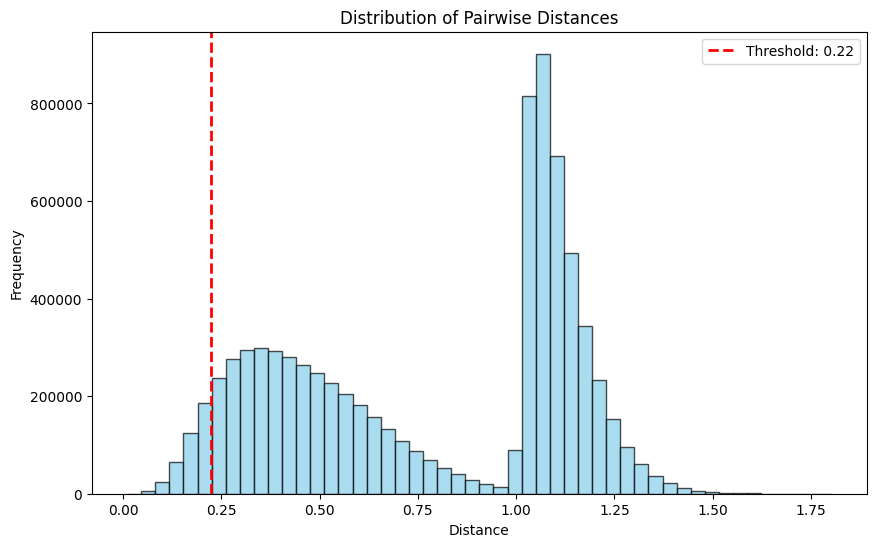

In [18]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 5)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.25378340613969635, k_max: 297


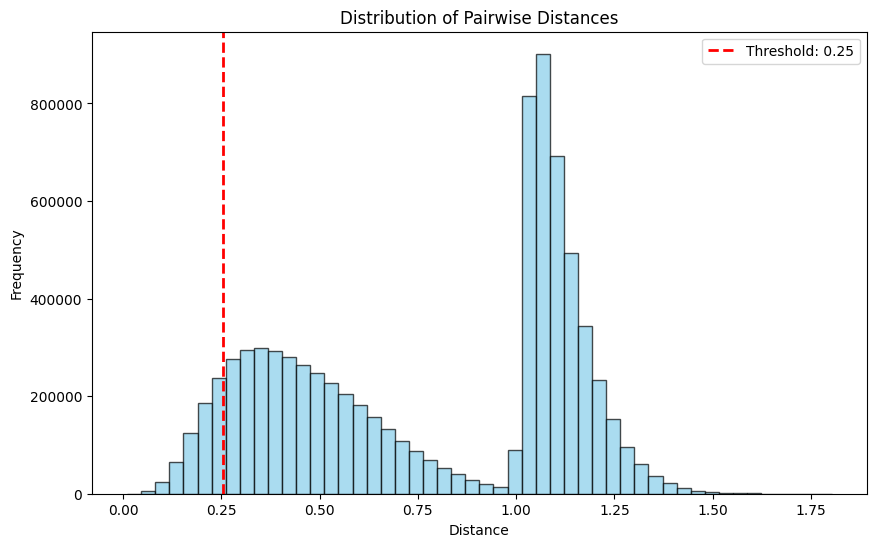

In [19]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 7.5)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.2804758014163619, k_max: 396


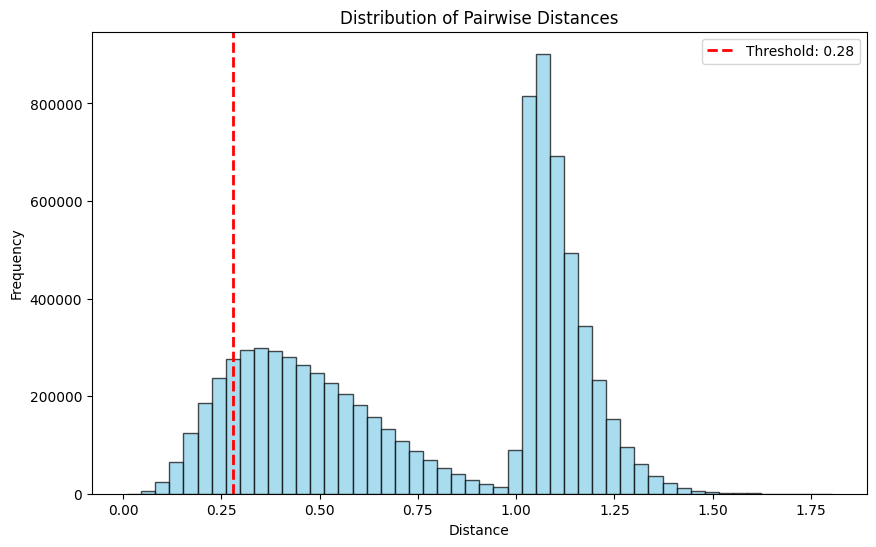

In [20]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 10)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)

Threshold: 0.3291962755668397, k_max: 595


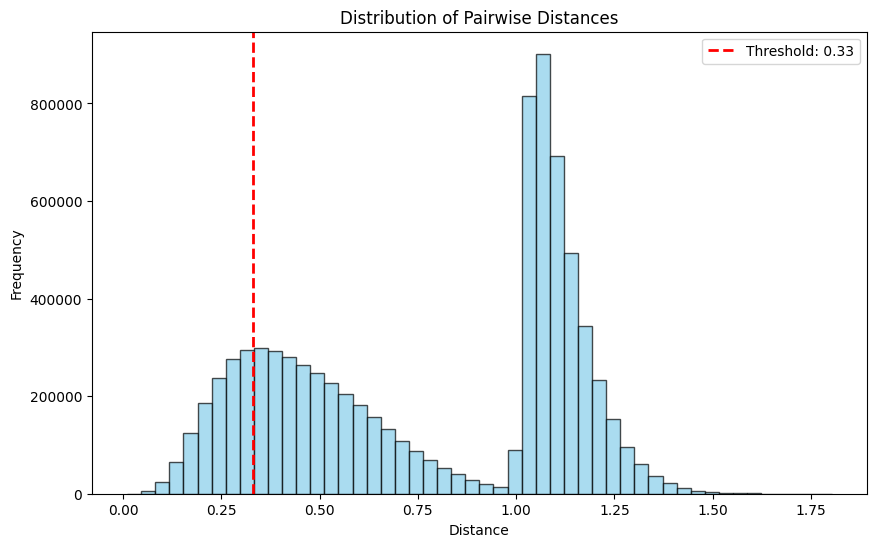

In [21]:
threshold, k_max, pairwise_distances = compute_threshold_and_kmax(X_train_preprocessed, 15)
print(f"Threshold: {threshold}, k_max: {k_max}")

# Plot the distance distribution
plot_distance_distribution(pairwise_distances, threshold)